Mount google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import all necessary libraries

In [3]:
import sys
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sb
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression


#Reading the dataset and loading to a dataframe

Reading rose data

In [4]:
df_rose = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TimeSeries/Rose.csv",parse_dates=True,index_col='YearMonth')
df_rose.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Reading sparkling data

In [5]:
df_sparkling = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TimeSeries/Sparkling.csv",parse_dates=True,index_col='YearMonth')
df_sparkling.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


#Plotting time series

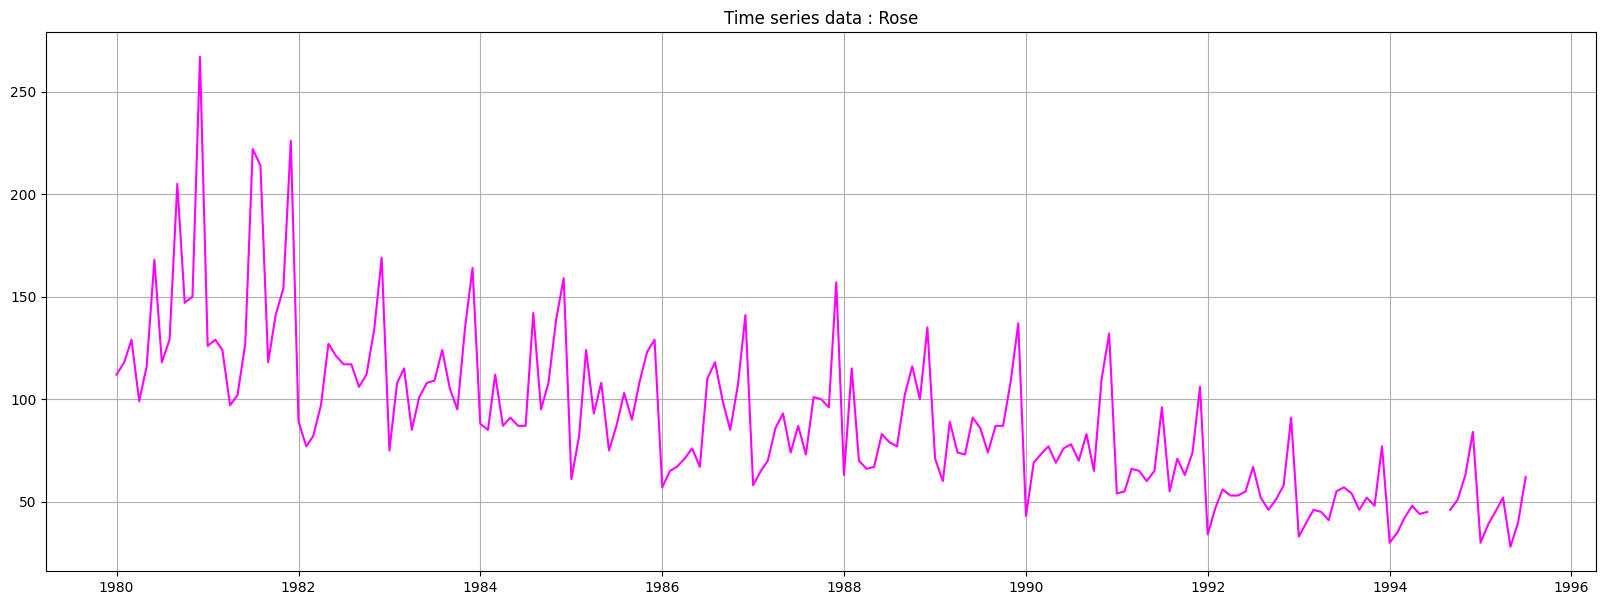

In [6]:

plt.figure(figsize=(20,7))
plt.plot(df_rose,color='magenta');
plt.title("Time series data : Rose")
plt.grid()

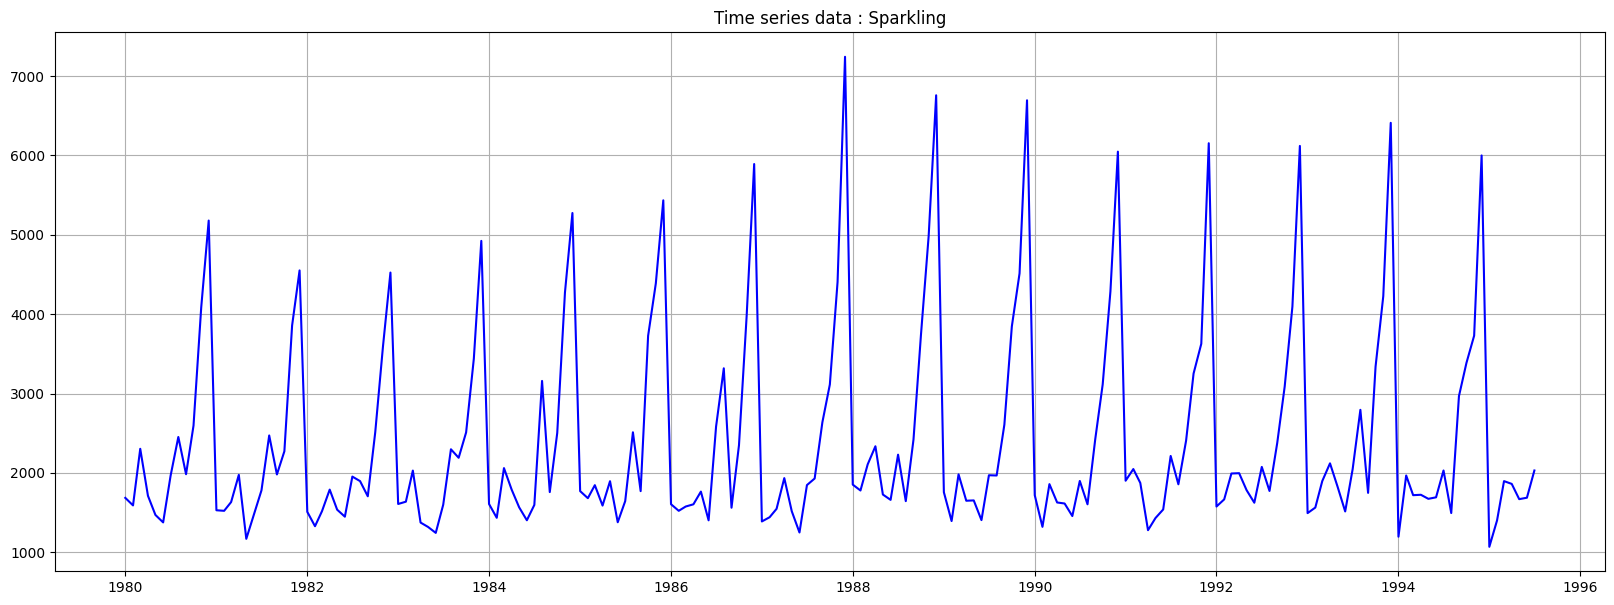

In [7]:

plt.figure(figsize=(20,7))
plt.plot(df_sparkling,color='blue');
plt.title("Time series data : Sparkling")
plt.grid()



#2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

## Exploratory Data Analysis decomposition on Rose dataset.

In [8]:
df_rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [9]:
df_rose.isnull().sum()

Rose    2
dtype: int64

In [10]:
#df_rose[(df_rose.index=='1994-07-01') | (df_rose.index=='1994-08-01')]
df_rose[df_rose.Rose.isnull()==True]

,Rose
YearMonth,
1994-07-01,NaN
1994-08-01,NaN


In [11]:
df_rose.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


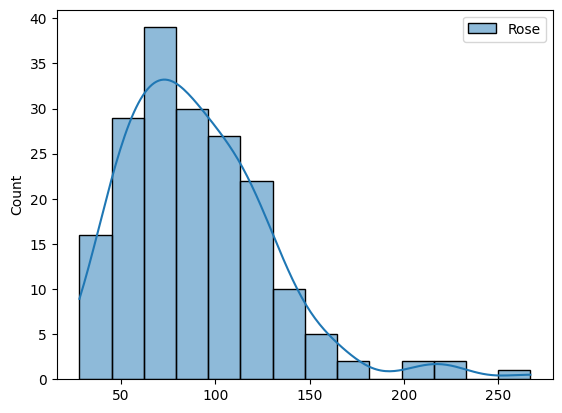

In [12]:
sb.histplot(df_rose,kde=True);

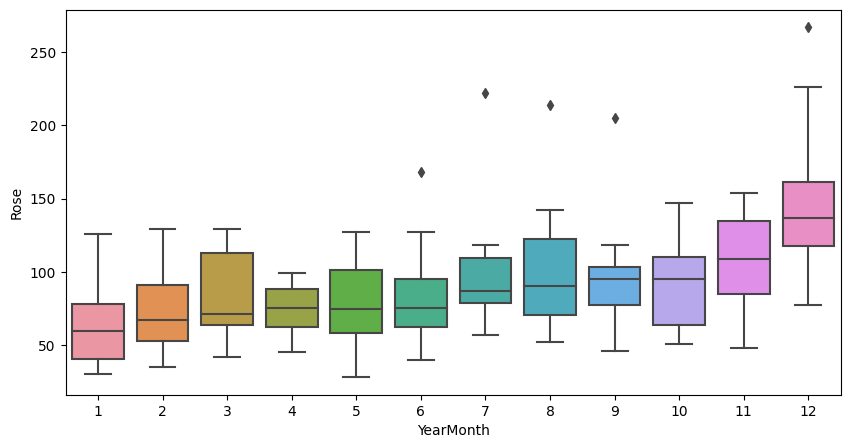

In [13]:
plt.figure(figsize=(10,5))
sb.boxplot(x=df_rose.index.month,y=df_rose.Rose)
plt.show()

Treating missing values in rose time series

In [14]:
df_rose = df_rose.interpolate(method='quadratic')
df_rose.isnull().sum()

Rose    0
dtype: int64

In [33]:
df_rose[df_rose.index.isin(['1994-07-01','1994-08-01'])]

,Rose
YearMonth,
1994-07-01,45.364189
1994-08-01,44.279246


Time series plot after treating missing values

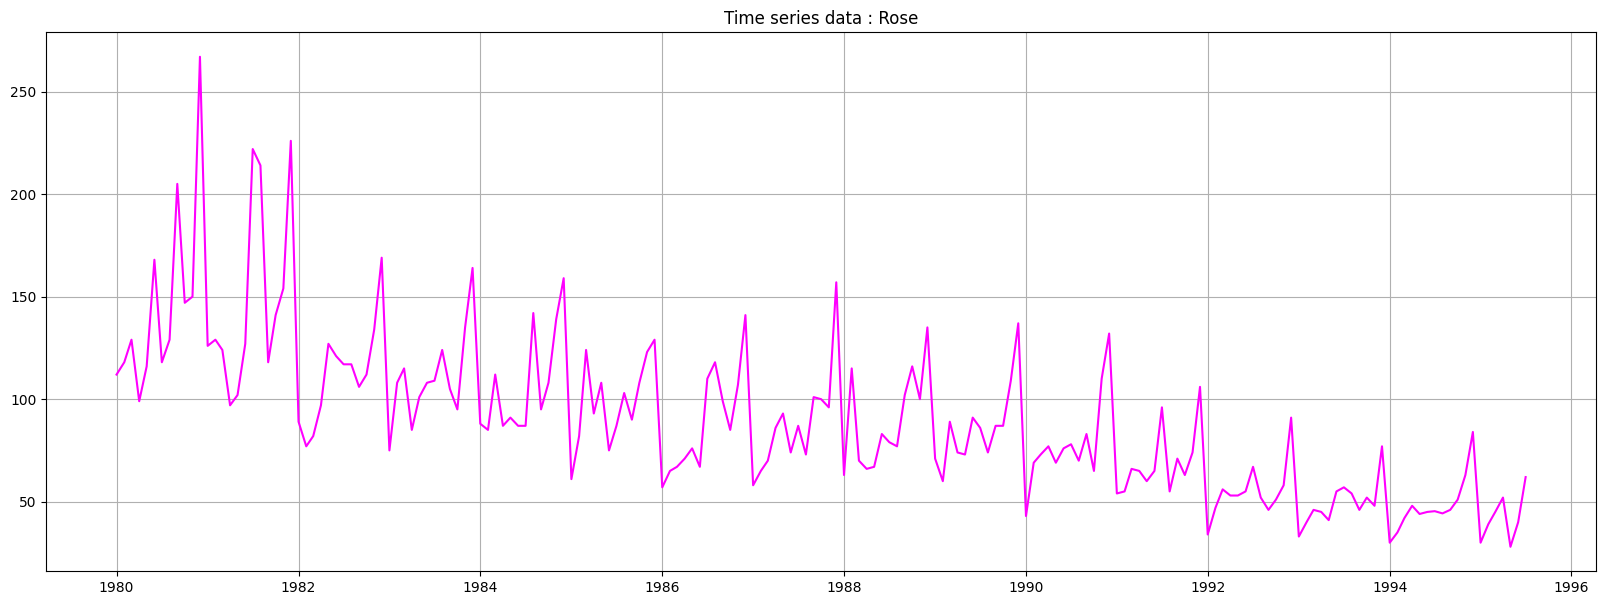

In [15]:
plt.figure(figsize=(20,7))
plt.plot(df_rose,color='magenta');
plt.title("Time series data : Rose")
plt.grid()

Decompose Data

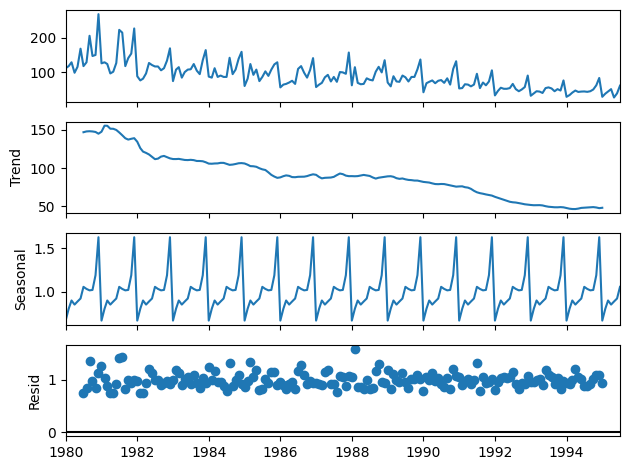

In [16]:

seasonal_decompose_additive=seasonal_decompose(df_rose,model='additive')

seasonal_decompose_multiplicative=seasonal_decompose(df_rose,model='multiplicative')
seasonal_decompose_multiplicative.plot();


<Axes: xlabel='resid', ylabel='Density'>

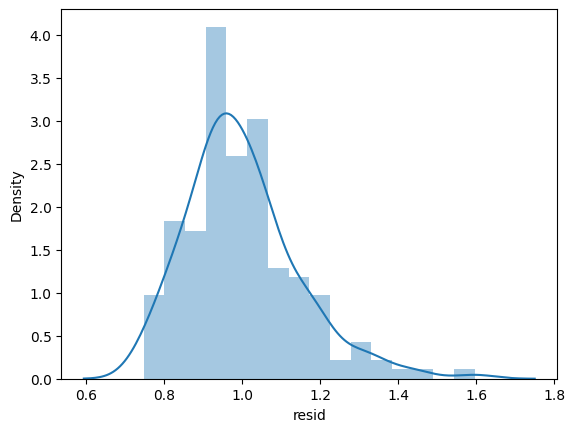

In [17]:
sb.distplot(seasonal_decompose_multiplicative.resid)

<Axes: xlabel='resid', ylabel='Density'>

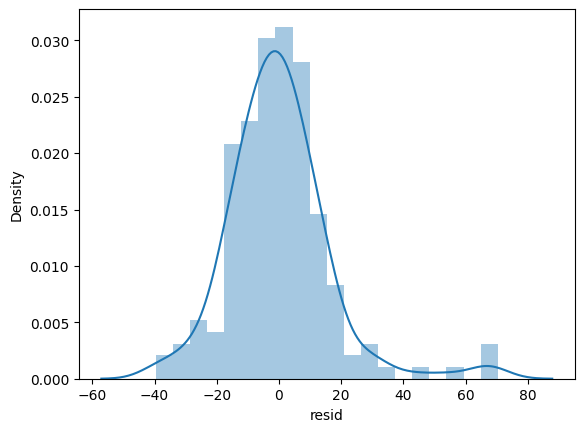

In [18]:
sb.distplot(seasonal_decompose_additive.resid)

## Exploratory Data Analysis decomposition on Sparkling dataset.

In [19]:
df_sparkling.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [20]:
df_sparkling.isnull().sum()

Sparkling    0
dtype: int64

In [21]:
df_sparkling.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


<Axes: ylabel='Count'>

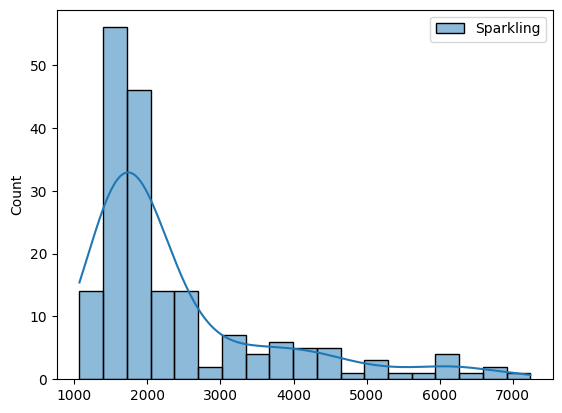

In [22]:
sb.histplot(df_sparkling,kde=True)

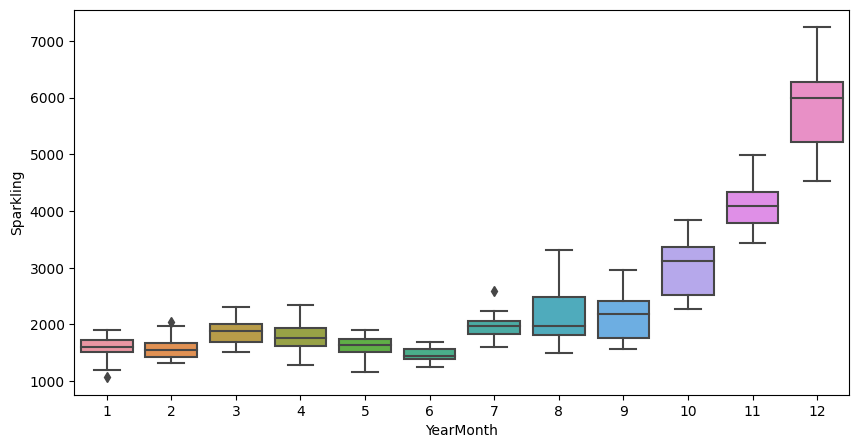

In [23]:
plt.figure(figsize=(10,5))
sb.boxplot(x=df_sparkling.index.month,y=df_sparkling.Sparkling)
plt.show()

Decomposing data

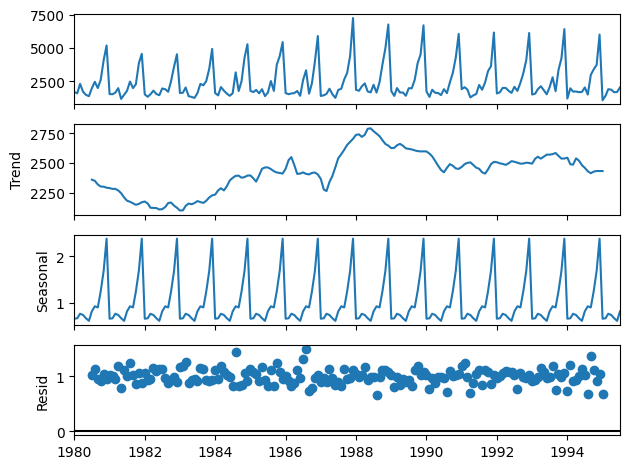

In [24]:

seasonal_decompose_additive=seasonal_decompose(df_sparkling,model='additive')

seasonal_decompose_multiplicative=seasonal_decompose(df_sparkling,model='multiplicative')
seasonal_decompose_multiplicative.plot();

#3. Split the data into training and test. The test data should start in 1991.

##Rose Data

In [34]:
rose_train = df_rose[df_rose.index.year<1991]
rose_test = df_rose[df_rose.index.year>1990]
print("----------------------------------------------------------")
print(rose_train.index)
print("----------------------------------------------------------")
print(rose_test.index)
print(rose_train.count()+rose_test.count())


----------------------------------------------------------
DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1990-03-01', '1990-04-01', '1990-05-01', '1990-06-01',
               '1990-07-01', '1990-08-01', '1990-09-01', '1990-10-01',
               '1990-11-01', '1990-12-01'],
              dtype='datetime64[ns]', name='YearMonth', length=132, freq=None)
----------------------------------------------------------
DatetimeIndex(['1991-01-01', '1991-02-01', '1991-03-01', '1991-04-01',
               '1991-05-01', '1991-06-01', '1991-07-01', '1991-08-01',
               '1991-09-01', '1991-10-01', '1991-11-01', '1991-12-01',
               '1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01', '1992-11-01', '

In [35]:
print('First few rows of Training Data','\n',rose_train.head(),'\n')
print('Last few rows of Training Data','\n',rose_train.tail(),'\n')
print('First few rows of Test Data','\n',rose_test.head(),'\n')
print('Last few rows of Test Data','\n',rose_test.tail(),'\n')

First few rows of Training Data 
              Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0 

Last few rows of Training Data 
              Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0 

First few rows of Test Data 
             Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0 

Last few rows of Test Data 
             Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0 



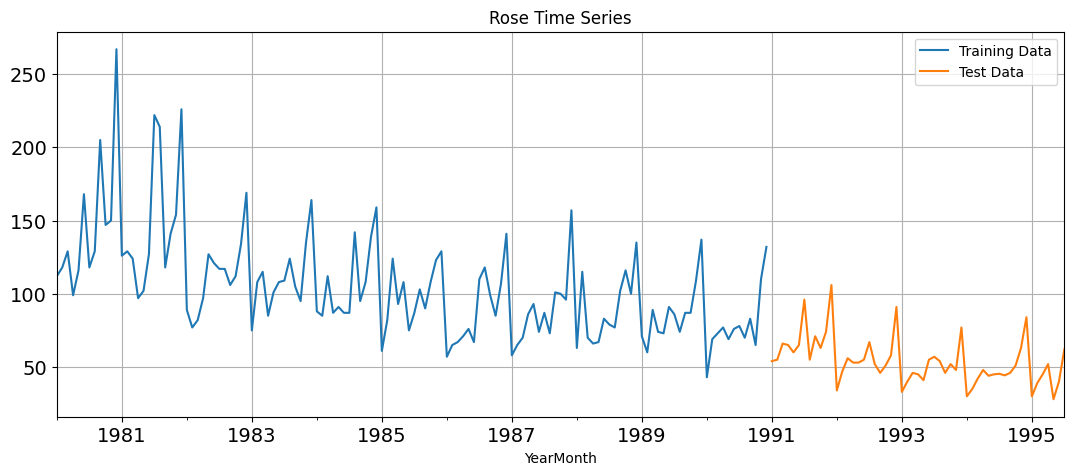

In [36]:
rose_train['Rose'].plot(figsize=(13,5), fontsize=14)
rose_test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.title("Rose Time Series")
plt.legend(['Training Data','Test Data'])
plt.show()

##Sparkling Data

In [37]:
sparkling_train = df_sparkling[df_sparkling.index.year<1991]
sparkling_test = df_sparkling[df_sparkling.index.year>1990]
print("----------------------------------------------------------")
print(sparkling_train.index)
print("----------------------------------------------------------")
print(sparkling_test.index)
print(sparkling_train.count()+sparkling_test.count())

----------------------------------------------------------
DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1990-03-01', '1990-04-01', '1990-05-01', '1990-06-01',
               '1990-07-01', '1990-08-01', '1990-09-01', '1990-10-01',
               '1990-11-01', '1990-12-01'],
              dtype='datetime64[ns]', name='YearMonth', length=132, freq=None)
----------------------------------------------------------
DatetimeIndex(['1991-01-01', '1991-02-01', '1991-03-01', '1991-04-01',
               '1991-05-01', '1991-06-01', '1991-07-01', '1991-08-01',
               '1991-09-01', '1991-10-01', '1991-11-01', '1991-12-01',
               '1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01', '1992-11-01', '

In [38]:
print('First few rows of Training Data','\n',sparkling_train.head(),'\n')
print('Last few rows of Training Data','\n',sparkling_train.tail(),'\n')
print('First few rows of Test Data','\n',sparkling_test.head(),'\n')
print('Last few rows of Test Data','\n',sparkling_test.tail(),'\n')

First few rows of Training Data 
             Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471 

Last few rows of Training Data 
             Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047 

First few rows of Test Data 
             Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432 

Last few rows of Test Data 
             Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031 



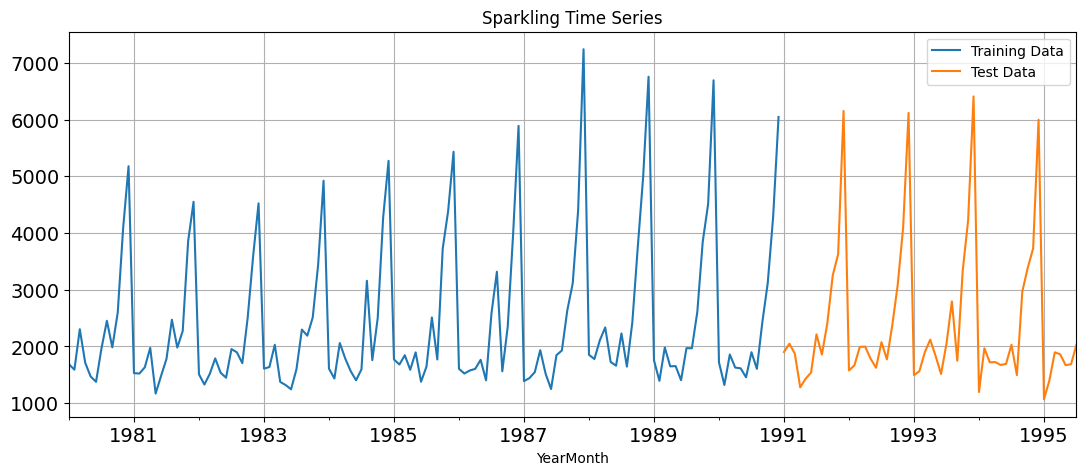

In [39]:
sparkling_train['Sparkling'].plot(figsize=(13,5), fontsize=14)
sparkling_test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.title("Sparkling Time Series")
plt.legend(['Training Data','Test Data'])
plt.show()

#4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

##Rose

###Simple Exponential Smoothing

In [40]:
model_ses_rose  = SimpleExpSmoothing(rose_train,initialization_method='estimated').fit(optimized=True)
model_ses_rose.params
alpha = model_ses_rose.params['smoothing_level'].round(2)
prediction_ses_rose = model_ses_rose.forecast(steps=len(rose_test))


RSME of SES model on Rose data

In [41]:
RSME = mean_squared_error(rose_test.values,prediction_ses_rose.values)
print("Rose model SES RSME : ",mean_squared_error(rose_test.values,prediction_ses_rose.values))

results_df = pd.DataFrame({'Data':['Rose'],'Model':['Alpha-0.1, SES'],'RSME':[np.round(RSME,2)]})
results_df

Rose model SES RSME :  1356.0409404479487


,Data,Model,RSME
0,Rose,"Alpha-0.1, SES",1356.04


###Double Exponential Smoothing

In [42]:
model_des_rose = Holt(rose_train,initialization_method='estimated').fit()
alpha = model_des_rose.params['smoothing_level'].round(3)
beta = model_des_rose.params['smoothing_trend'].round(3)
prediction_des_rose = model_des_rose.forecast(steps = len(rose_test))


RSME of DES rose data

In [43]:
RSME = mean_squared_error(rose_test.values,prediction_des_rose.values)
results_df = results_df.append({'Data':'Rose','Model':"Alpha-"+str(alpha)+", Beta-"+str(beta)+", DES",'RSME':RSME.round(2)},ignore_index=True)
results_df

,Data,Model,RSME
0,Rose,"Alpha-0.1, SES",1356.04
1,Rose,"Alpha-0.0, Beta-0.0, DES",233.49


###Triple Exponential Smoothing

In [44]:
model_tes_rose = ExponentialSmoothing(rose_train,trend='additive',seasonal='additive',initialization_method='estimated').fit()
alpha = model_tes_rose.params['smoothing_level'].round(3)
beta = model_tes_rose.params['smoothing_trend'].round(3)
gamma = model_tes_rose.params['smoothing_seasonal'].round(3)
prediction_tes_rose = model_tes_rose.forecast(steps = len(rose_test))


RSME of TES rose data

In [45]:
RSME = mean_squared_error(rose_test.values,prediction_tes_rose.values)
results_df = results_df.append({'Data':'Rose','Model':"Alpha-"+str(alpha)+", Beta-"+str(beta)+", Gamma-"+str(gamma)+", TES",'RSME':RSME.round(2)},ignore_index=True)
results_df

,Data,Model,RSME
0,Rose,"Alpha-0.1, SES",1356.04
1,Rose,"Alpha-0.0, Beta-0.0, DES",233.49
2,Rose,"Alpha-0.085, Beta-0.0, Gamma-0.001, TES",203.57


Plotting predictions of all exponential models

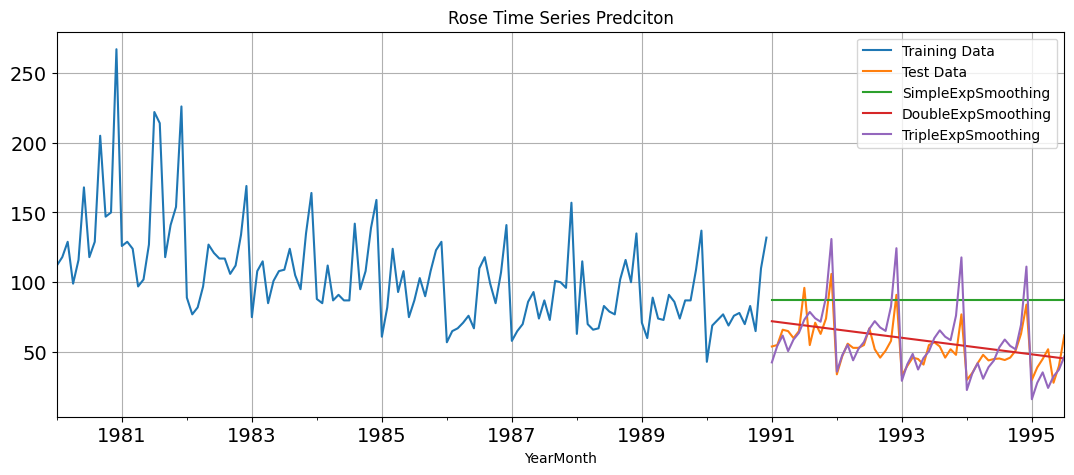

In [46]:
rose_train['Rose'].plot(figsize=(13,5), fontsize=14)
rose_test['Rose'].plot(figsize=(13,5), fontsize=14)
prediction_ses_rose.plot(figsize=(13,5), fontsize=14)
prediction_des_rose.plot(figsize=(13,5), fontsize=14)
prediction_tes_rose.plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.title("Rose Time Series Predciton")
plt.legend(['Training Data','Test Data','SimpleExpSmoothing','DoubleExpSmoothing','TripleExpSmoothing'])
plt.show()

###Linear Regression

In [135]:
train_time  = np.arange(1,len(rose_train)+1)
test_time = np.arange(len(rose_train),len(df_rose))
rose_train_copy = rose_train.copy(deep=True)
rose_test_copy = rose_test.copy(deep=True)
rose_train_copy['time']=train_time
rose_test_copy['time']=test_time
lr = LinearRegression()
lr.fit(rose_train_copy['time'].values.reshape(-1,1),rose_train_copy['Rose'])
predictions = lr.predict(rose_test_copy['time'].values.reshape(-1,1))
RSME = mean_squared_error(rose_test_copy['Rose'],predictions)
print(RSME)

238.50321576709237


In [48]:
results_df = results_df.append({'Data':'Rose','Model':"LinearRegression",'RSME':RSME.round(2)},ignore_index=True)
results_df
rose_test_copy['Linear_regression']=predictions


,Data,Model,RSME
0,Rose,"Alpha-0.1, SES",1356.04
1,Rose,"Alpha-0.0, Beta-0.0, DES",233.49
2,Rose,"Alpha-0.085, Beta-0.0, Gamma-0.001, TES",203.57
3,Rose,LinearRegression,238.50


###Naive Approach

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [141]:
rose_test_copy['naive'] = np.asarray(rose_test_copy['Rose'])[len(np.asarray(rose_test_copy['Rose']))-1]
rose_test_copy['naive'].head()
RSME = mean_squared_error(rose_test_copy['Rose'],rose_test_copy['naive'])

results_df = results_df.append({'Data':'Rose','Model':"NaiveApproach",'RSME':RSME.round(2)},ignore_index=True)
results_df

,Data,Model,RSME
0,Rose,"Alpha-0.1, SES",1356.04
1,Rose,"Alpha-0.0, Beta-0.0, DES",233.49
2,Rose,"Alpha-0.085, Beta-0.0, Gamma-0.001, TES",203.57
3,Rose,LinearRegression,238.50
4,Rose,NaiveApproach,315.56
5,Rose,SimpleAverage,2860.99
6,Sparkling,"Alpha-0.07, SES",1790256.37
7,Sparkling,"Alpha-0.665, Beta-0.0, DES",28003992.17
8,Sparkling,"Alpha-0.111, Beta-0.012, Gamma-0.461, TES",143357.83
9,Sparkling,NaiveApproach,1761343.20


###Simple Average
For this particular simple average method, we will forecast by using the average of the training values.

In [142]:
rose_train_copy
rose_test_copy
rose_test_copy['mean_forecast'] = rose_train_copy['Rose'].mean()
rose_test_copy.head()
RSME = mean_squared_error(rose_test_copy['Rose'],rose_test_copy['mean_forecast'])
print(RSME)
results_df = results_df.append({'Data':'Rose','Model':"SimpleAverage",'RSME':RSME.round(2)},ignore_index=True)
results_df

2860.991051153992


,Data,Model,RSME
0,Rose,"Alpha-0.1, SES",1356.04
1,Rose,"Alpha-0.0, Beta-0.0, DES",233.49
2,Rose,"Alpha-0.085, Beta-0.0, Gamma-0.001, TES",203.57
3,Rose,LinearRegression,238.50
4,Rose,NaiveApproach,315.56
5,Rose,SimpleAverage,2860.99
6,Sparkling,"Alpha-0.07, SES",1790256.37
7,Sparkling,"Alpha-0.665, Beta-0.0, DES",28003992.17
8,Sparkling,"Alpha-0.111, Beta-0.012, Gamma-0.461, TES",143357.83
9,Sparkling,NaiveApproach,1761343.20


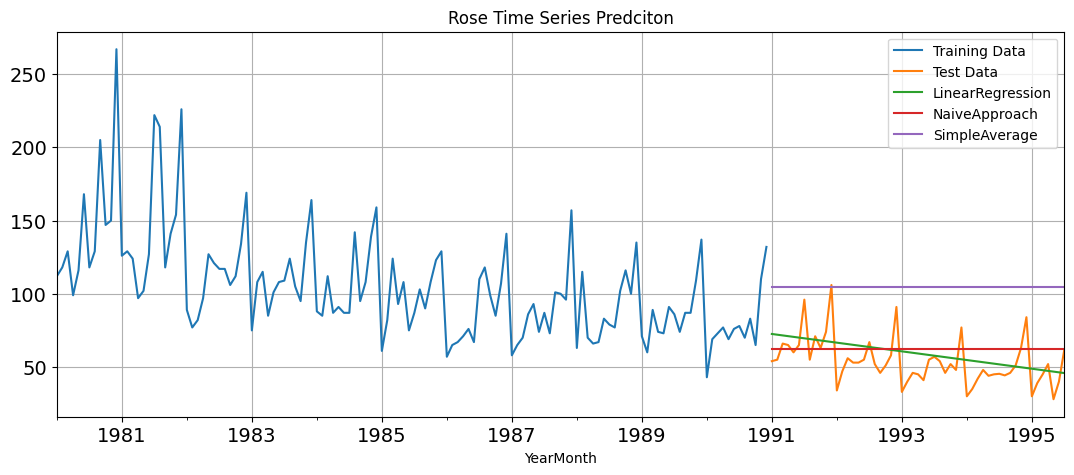

In [143]:
rose_train['Rose'].plot(figsize=(13,5), fontsize=14)
rose_test['Rose'].plot(figsize=(13,5), fontsize=14)
rose_test_copy['Linear_regression'].plot(figsize=(13,5), fontsize=14)
rose_test_copy['naive'].plot(figsize=(13,5), fontsize=14)
rose_test_copy['mean_forecast'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.title("Rose Time Series Predciton")
plt.legend(['Training Data','Test Data','LinearRegression','NaiveApproach','SimpleAverage'])
plt.show()

##Sparkling

####Simple Exponential Smoothing

In [155]:
model_ses_sparkling = SimpleExpSmoothing(sparkling_train,initialization_method='estimated').fit(optimized=True)
model_ses_sparkling.params
alpha = model_ses_sparkling.params['smoothing_level'].round(3)
prediction_ses_sparkling = model_ses_sparkling.forecast(steps=len(sparkling_test))

RSME of SES model on Sparkling data

In [156]:
#print("Sparkling model SES RSME : ",mean_squared_error(sparkling_test.values,prediction_ses_sparkling.values))
RSME = mean_squared_error(sparkling_test.values,prediction_ses_sparkling.values)
results_df=results_df.append({'Data':'Sparkling','Model':"Alpha-"+str(alpha)+", SES",'RSME':np.round(RSME,2)},ignore_index=True)

###Double Exponential Smoothing

In [157]:
model_des_sparkling = Holt(sparkling_train,initialization_method='estimated').fit()
alpha = model_des_sparkling.params['smoothing_level'].round(3)
beta = model_des_sparkling.params['smoothing_trend'].round(3)
prediction_des_sparkling = model_des_sparkling.forecast(steps = len(sparkling_test))

RSME of DES on Sparkling Data

In [158]:
RSME = mean_squared_error(sparkling_test.values,prediction_des_sparkling.values)
results_df = results_df.append({'Data':'Sparkling','Model':"Alpha-"+str(alpha)+", Beta-"+str(beta)+", DES",'RSME':RSME.round(2)},ignore_index=True)
results_df

,Data,Model,RSME
0,Rose,"Alpha-0.1, SES",1356.04
1,Rose,"Alpha-0.0, Beta-0.0, DES",233.49
2,Rose,"Alpha-0.085, Beta-0.0, Gamma-0.001, TES",203.57
3,Rose,LinearRegression,238.50
4,Rose,NaiveApproach,315.56
5,Rose,SimpleAverage,2860.99
6,Sparkling,"Alpha-0.07, SES",1790256.37
7,Sparkling,"Alpha-0.665, Beta-0.0, DES",28003992.17
8,Sparkling,"Alpha-0.111, Beta-0.012, Gamma-0.461, TES",143357.83
9,Sparkling,NaiveApproach,1761343.20


###Triple Exponential Smoothing

In [159]:
model_tes_sparkling = ExponentialSmoothing(sparkling_train,trend='additive',seasonal='additive',initialization_method='estimated').fit()
alpha = model_tes_sparkling.params['smoothing_level'].round(3)
beta = model_tes_sparkling.params['smoothing_trend'].round(3)
gamma = model_tes_sparkling.params['smoothing_seasonal'].round(3)
prediction_tes_sparkling = model_tes_sparkling.forecast(steps = len(sparkling_test))

In [160]:
RSME = mean_squared_error(sparkling_test.values,prediction_tes_sparkling.values)
results_df = results_df.append({'Data':'Sparkling','Model':"Alpha-"+str(alpha)+", Beta-"+str(beta)+", Gamma-"+str(gamma)+", TES",'RSME':RSME.round(2)},ignore_index=True)
results_df

,Data,Model,RSME
0,Rose,"Alpha-0.1, SES",1356.04
1,Rose,"Alpha-0.0, Beta-0.0, DES",233.49
2,Rose,"Alpha-0.085, Beta-0.0, Gamma-0.001, TES",203.57
3,Rose,LinearRegression,238.50
4,Rose,NaiveApproach,315.56
5,Rose,SimpleAverage,2860.99
6,Sparkling,"Alpha-0.07, SES",1790256.37
7,Sparkling,"Alpha-0.665, Beta-0.0, DES",28003992.17
8,Sparkling,"Alpha-0.111, Beta-0.012, Gamma-0.461, TES",143357.83
9,Sparkling,NaiveApproach,1761343.20


Plotting predictions of all exponential models

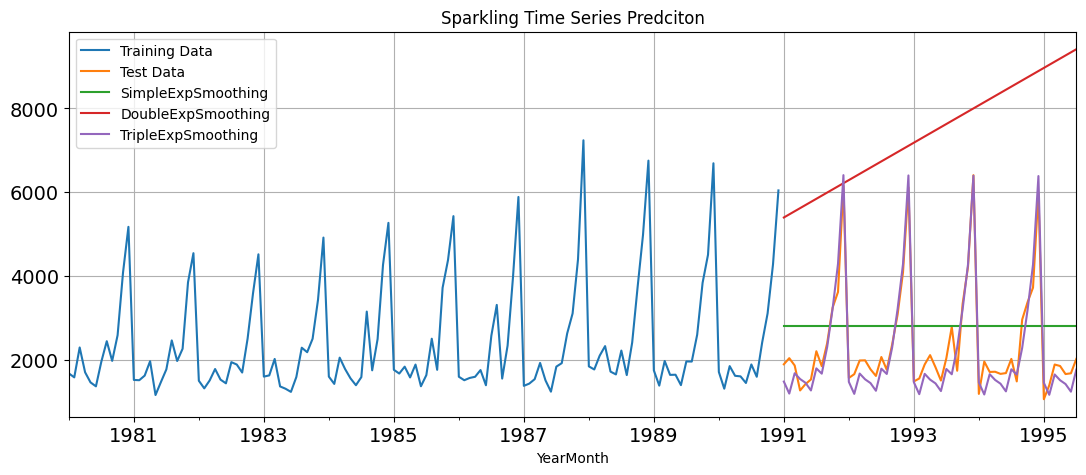

In [161]:
sparkling_train['Sparkling'].plot(figsize=(13,5),fontsize=14)
sparkling_test['Sparkling'].plot(figsize=(13,5),fontsize=14)
prediction_ses_sparkling.plot(figsize=(13,5),fontsize=14)
prediction_des_sparkling.plot(figsize=(13,5),fontsize=14)
prediction_tes_sparkling.plot(figsize=(13,5),fontsize=14)
plt.grid()
plt.title("Sparkling Time Series Predciton")
plt.legend(['Training Data','Test Data','SimpleExpSmoothing','DoubleExpSmoothing','TripleExpSmoothing'])
plt.show()

###Linear Regression

In [162]:
train_time  = np.arange(1,len(sparkling_train)+1)
test_time = np.arange(len(sparkling_train),len(df_sparkling))
sparkling_train_copy = sparkling_train.copy(deep=True)
sparkling_test_copy = sparkling_test.copy(deep=True)
sparkling_train_copy['time']=train_time
sparkling_test_copy['time']=test_time
lr = LinearRegression()
lr.fit(sparkling_train_copy['time'].values.reshape(-1,1),sparkling_train_copy['Sparkling'])
predictions = lr.predict(sparkling_test_copy['time'].values.reshape(-1,1))
RSME = mean_squared_error(sparkling_test_copy['Sparkling'],predictions)
print(RSME)
results_df = results_df.append({'Data':'Sparkling','Model':"LinearRegression",'RSME':RSME.round(2)},ignore_index=True)
sparkling_test_copy['Linear_regression']=predictions

1923314.7647933357


###Naive Approach

In [163]:
sparkling_test_copy['naive'] = np.asarray(sparkling_test_copy['Sparkling'])[len(np.asarray(sparkling_test_copy['Sparkling']))-1]
sparkling_test_copy['naive'].head()
RSME = mean_squared_error(sparkling_test_copy['Sparkling'],sparkling_test_copy['naive'])

results_df = results_df.append({'Data':'Sparkling','Model':"NaiveApproach",'RSME':RSME.round(2)},ignore_index=True)


###Simple Average
For this particular simple average method, we will forecast by using the average of the training values.

In [164]:
sparkling_train_copy
sparkling_test_copy
sparkling_test_copy['mean_forecast'] = sparkling_train_copy['Sparkling'].mean()
sparkling_test_copy.head()
RSME = mean_squared_error(sparkling_test_copy['Sparkling'],sparkling_test_copy['mean_forecast'])
print(RSME)
results_df = results_df.append({'Data':'Sparkling','Model':"SimpleAverage",'RSME':RSME.round(2)},ignore_index=True)


1625833.6061179985


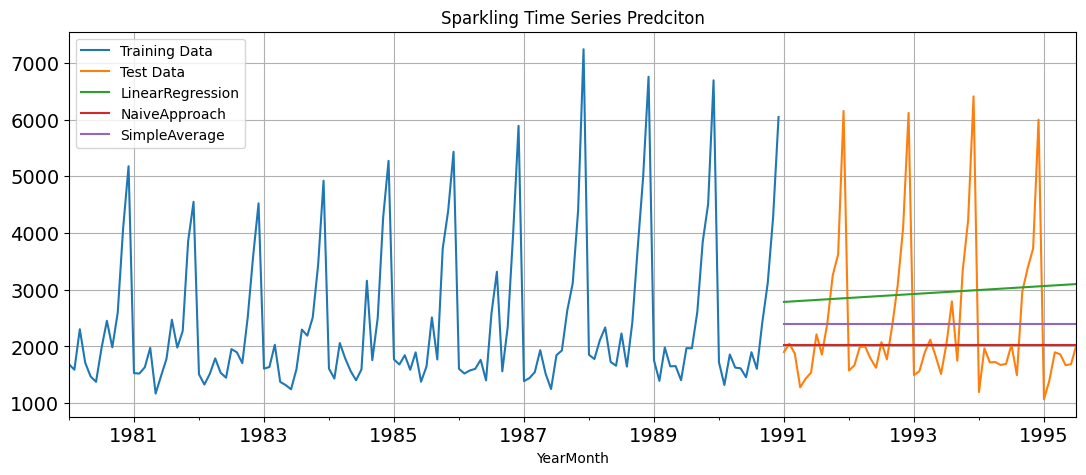

In [165]:
sparkling_test_copy['Linear_regression']=predictions
sparkling_train['Sparkling'].plot(figsize=(13,5),fontsize=14)
sparkling_test['Sparkling'].plot(figsize=(13,5),fontsize=14)
sparkling_test_copy['Linear_regression'].plot(figsize=(13,5),fontsize=14)
sparkling_test_copy['naive'].plot(figsize=(13,5),fontsize=14)
sparkling_test_copy['mean_forecast'].plot(figsize=(13,5),fontsize=14)
plt.grid()
plt.title("Sparkling Time Series Predciton")
plt.legend(['Training Data','Test Data','LinearRegression','NaiveApproach','SimpleAverage'])
plt.show()

In [166]:
results_df

,Data,Model,RSME
0,Rose,"Alpha-0.1, SES",1356.04
1,Rose,"Alpha-0.0, Beta-0.0, DES",233.49
2,Rose,"Alpha-0.085, Beta-0.0, Gamma-0.001, TES",203.57
3,Rose,LinearRegression,238.50
4,Rose,NaiveApproach,315.56
5,Rose,SimpleAverage,2860.99
6,Sparkling,"Alpha-0.07, SES",1790256.37
7,Sparkling,"Alpha-0.665, Beta-0.0, DES",28003992.17
8,Sparkling,"Alpha-0.111, Beta-0.012, Gamma-0.461, TES",143357.83
9,Sparkling,NaiveApproach,1761343.20


#5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

Dickey-Fuller Test - Dicky Fuller Test on the timeseries is run to check for stationarity of data.

Null Hypothesis H0
: Time Series is non-stationary.

Alternate Hypothesis Ha
: Time Series is stationary.

So Ideally if p-value < 0.05 then null hypothesis: TS is non-stationary is rejected else the TS is non-stationary is failed to be rejected .

##Rose

In [61]:
stationarity_test_rose = adfuller(df_rose.Rose,autolag='AIC')
print("ADF Statistic",stationarity_test_rose[0])
print("p-value",stationarity_test_rose[1])

ADF Statistic -1.8726151553446717
p-value 0.3450514091014409


the p-value 0.34 is very large, and not smaller than 0.05 and thus is not a stationary series.

Converting non-stationary to stationary To detrend the time series data there are certain transformation techniques used and they are listed as follows.

Log transforming of the data

Taking the square root of the data

Taking the cube root

Proportional change

ADF Statistic -8.66618298970424
p-value 0.0


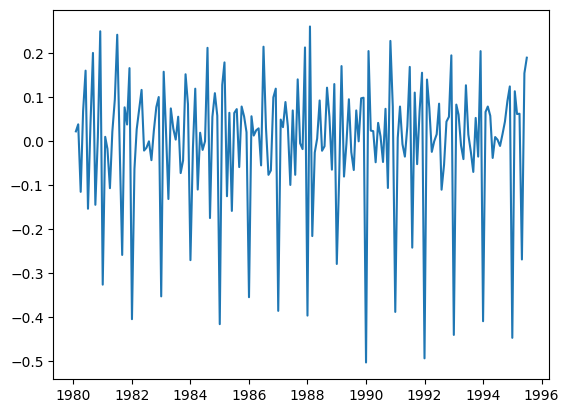

In [62]:
df_copy_rose_stry = df_rose.copy(deep=True)
df_copy_rose_stry = np.log10(df_rose).diff(periods=1).dropna()
stationarity_test_rose = adfuller(df_copy_rose_stry.Rose,autolag='AIC')
print("ADF Statistic",stationarity_test_rose[0])
print("p-value",stationarity_test_rose[1].round(3))
plt.plot(df_copy_rose_stry);

Now the data is stationary as p values is less than significant value 0.05

##Sparkling

In [63]:
stationarity_test_sparkling = adfuller(df_sparkling.Sparkling,autolag='AIC')
print("ADF Statistic",stationarity_test_sparkling[0])
print("p-value",stationarity_test_sparkling[1])


ADF Statistic -1.3604974548123345
p-value 0.6010608871634866


the p-value 0.6 is very large, and not smaller than 0.05 and thus is not a stationary series.

Converting non-stationary to stationary
To detrend the time series data there are certain transformation techniques used and they are listed as follows.

Log transforming of the data

Taking the square root of the data

Taking the cube root

Proportional change

ADF Statistic -31.861733113543316
p-value 0.0


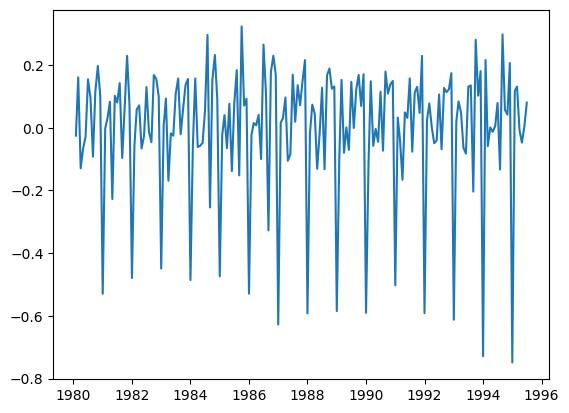

In [64]:
df_copy_sparkling_stry = df_sparkling.copy(deep=True)
df_copy_sparkling_stry = np.log10(df_sparkling).diff(periods=1).dropna()
stationarity_test_sparkling = adfuller(df_copy_sparkling_stry.Sparkling,autolag='AIC')
print("ADF Statistic",stationarity_test_sparkling[0])
print("p-value",stationarity_test_sparkling[1])
plt.plot(df_copy_sparkling_stry);

Now the data is stationary as p values is less than significant value 0.05

#6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [65]:
d= range(0,3)
p= range(0,3)
q= range(0,3)

#Generate all different combinations of p with d=0 and q=0 triplets for AR model building
pdq_ar = list(itertools.product(p, range(1), range(1)))

#Generate all different combinations of p,q with d=0 triplets for ARMA model building
pdq_arma = list(itertools.product(p, range(1),q))

#Generate all different combinations of p, d and q triplets for ARIMA model building
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [66]:
rose_model_aic = pd.DataFrame(columns=['param', 'AIC'])
rose_model_aic
sparkling_model_aic = pd.DataFrame(columns=['param', 'AIC'])
sparkling_model_aic

,param,AIC


##Rose Data






###ARIMA

In [67]:
rose_train_log = np.log10(rose_train)
for param in pdq:
  arima_model_rose = ARIMA(rose_train_log,order = param).fit()
  #print('ARIMA{} - AIC:{}'.format(param,arima_model_rose.aic))
  rose_model_aic = rose_model_aic.append({'param':param, 'AIC': arima_model_rose.aic}, ignore_index=True)
rose_model_aic.sort_values(by='AIC',ascending=True).head()


,param,AIC
5,"(0, 1, 2)",-186.803249
14,"(1, 1, 2)",-186.195065
13,"(1, 1, 1)",-186.101119
11,"(1, 0, 2)",-185.365917
22,"(2, 1, 1)",-184.829175


Building ARIMA model with best parameters p,d,q

In [68]:
arima_model_rose = ARIMA(rose_train_log,order = (0,1,2)).fit()
best_arima_rose_results = arima_model_rose.forecast(steps=len(rose_test))
RSME = mean_squared_error(rose_test,np.power(10,best_arima_rose_results))
results_df = results_df.append({'Data':'Rose','Model':"ARIMA-(0,1,2)",'RSME':RSME.round(2)},ignore_index=True)
results_df

,Data,Model,RSME
0,Rose,"Alpha-0.1, SES",1356.04
1,Rose,"Alpha-0.0, Beta-0.0, DES",233.49
2,Rose,"Alpha-0.085, Beta-0.0, Gamma-0.001, TES",203.57
3,Rose,LinearRegression,238.50
4,Rose,NaiveApproach,315.56
5,Rose,SimpleAverage,2860.99
6,Sparkling,"Alpha-0.07, SES",1790256.37
7,Sparkling,"Alpha-0.665, Beta-0.0, DES",28003992.17
8,Sparkling,"Alpha-0.111, Beta-0.012, Gamma-0.461, TES",143357.83
9,Sparkling,NaiveApproach,1761343.20


###SARIMA

In [69]:
rose_model_aic = pd.DataFrame(columns=['param', 'AIC'])
rose_model_aic

,param,AIC


In [70]:

for param in pdq:
    for param_seasonal in seasonal_pdq:
        SARIMA_model_rose = sm.tsa.statespace.SARIMAX(rose_train_log,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
        rose_model_aic = rose_model_aic.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
rose_model_aic.sort_values(by='AIC',ascending=True).head()

,param,AIC,seasonal
253,"(1, 0, 0)",-257.620744,"(1, 0, 1, 12)"
10,"(0, 0, 0)",-256.170282,"(1, 0, 1, 12)"
280,"(1, 0, 1)",-255.482062,"(1, 0, 1, 12)"
37,"(0, 0, 1)",-254.978845,"(1, 0, 1, 12)"
496,"(2, 0, 0)",-253.620650,"(1, 0, 1, 12)"


Building SARIMA Model with best parameters

In [71]:
SARIMA_model_rose = sm.tsa.statespace.SARIMAX(rose_train_log,
                                            order=(1, 0, 1),
                                            seasonal_order=(1, 0, 1, 12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
best_sarima_rose_results = results_SARIMA_rose.get_forecast(steps=len(rose_test))
RSME = mean_squared_error(rose_test,np.power(10,best_sarima_rose_results.predicted_mean))
results_df = results_df.append({'Data':'Rose','Model':"SARIMA-(1, 0, 1, 12)",'RSME':RSME.round(2)},ignore_index=True)
results_df

,Data,Model,RSME
0,Rose,"Alpha-0.1, SES",1356.04
1,Rose,"Alpha-0.0, Beta-0.0, DES",233.49
2,Rose,"Alpha-0.085, Beta-0.0, Gamma-0.001, TES",203.57
3,Rose,LinearRegression,238.50
4,Rose,NaiveApproach,315.56
5,Rose,SimpleAverage,2860.99
6,Sparkling,"Alpha-0.07, SES",1790256.37
7,Sparkling,"Alpha-0.665, Beta-0.0, DES",28003992.17
8,Sparkling,"Alpha-0.111, Beta-0.012, Gamma-0.461, TES",143357.83
9,Sparkling,NaiveApproach,1761343.20


##Sparkling Data

###ARIMA

In [72]:
sparkling_train_log = np.log10(sparkling_train)
for param in pdq:
  arima_model_sparkling = ARIMA(sparkling_train_log,order = param).fit()
  #print('ARIMA{} - AIC:{}'.format(param,arima_model_sparkling.aic))
  sparkling_model_aic = sparkling_model_aic.append({'param':param, 'AIC': arima_model_sparkling.aic}, ignore_index=True)
sparkling_model_aic.sort_values(by='AIC',ascending=True).head()

,param,AIC
19,"(2, 0, 1)",-106.955371
23,"(2, 1, 2)",-98.830352
18,"(2, 0, 0)",-97.590175
2,"(0, 0, 2)",-97.470702
10,"(1, 0, 1)",-96.553751


Building ARIMA model with best parameters p,d,q

In [73]:
arima_model_sparkling = ARIMA(sparkling_train_log,order = (2,0,1)).fit()
best_arima_sparkling_results = arima_model_sparkling.forecast(steps=len(sparkling_test))
RSME = mean_squared_error(sparkling_test,np.power(10,best_arima_sparkling_results))
results_df = results_df.append({'Data':'Sparkling','Model':"ARIMA-(2,0,1)",'RSME':RSME.round(2)},ignore_index=True)
results_df

,Data,Model,RSME
0,Rose,"Alpha-0.1, SES",1356.04
1,Rose,"Alpha-0.0, Beta-0.0, DES",233.49
2,Rose,"Alpha-0.085, Beta-0.0, Gamma-0.001, TES",203.57
3,Rose,LinearRegression,238.50
4,Rose,NaiveApproach,315.56
5,Rose,SimpleAverage,2860.99
6,Sparkling,"Alpha-0.07, SES",1790256.37
7,Sparkling,"Alpha-0.665, Beta-0.0, DES",28003992.17
8,Sparkling,"Alpha-0.111, Beta-0.012, Gamma-0.461, TES",143357.83
9,Sparkling,NaiveApproach,1761343.20


###SARIMA

In [74]:
sparkling_model_aic = pd.DataFrame(columns=['param', 'AIC'])
sparkling_model_aic

,param,AIC


In [75]:

for param in pdq:
    for param_seasonal in seasonal_pdq:
        SARIMA_model_sparkling = sm.tsa.statespace.SARIMAX(sparkling_train_log,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA_sparkling = SARIMA_model_sparkling.fit(maxiter=1000)
        sparkling_model_aic = sparkling_model_aic.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_sparkling.aic}, ignore_index=True)
sparkling_model_aic.sort_values(by='AIC',ascending=True).head()

,param,AIC,seasonal
10,"(0, 0, 0)",-294.699108,"(1, 0, 1, 12)"
253,"(1, 0, 0)",-294.060273,"(1, 0, 1, 12)"
280,"(1, 0, 1)",-290.951540,"(1, 0, 1, 12)"
37,"(0, 0, 1)",-290.485094,"(1, 0, 1, 12)"
64,"(0, 0, 2)",-289.511663,"(1, 0, 1, 12)"


Building SARIMA Model with best parameters

In [76]:
SARIMA_model_sparkling = sm.tsa.statespace.SARIMAX(sparkling_train_log,
                                            order=(1, 0, 1),
                                            seasonal_order=(1, 0, 1, 12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

results_SARIMA_sparkling = SARIMA_model_sparkling.fit(maxiter=1000)
best_sarima_sparkling_results = results_SARIMA_sparkling.get_forecast(steps=len(sparkling_test))
RSME = mean_squared_error(sparkling_test,np.power(10,best_sarima_sparkling_results.predicted_mean))
results_df = results_df.append({'Data':'Sparkling','Model':"SARIMA-(1, 0, 1, 12)",'RSME':RSME.round(2)},ignore_index=True)
results_df

,Data,Model,RSME
0,Rose,"Alpha-0.1, SES",1356.04
1,Rose,"Alpha-0.0, Beta-0.0, DES",233.49
2,Rose,"Alpha-0.085, Beta-0.0, Gamma-0.001, TES",203.57
3,Rose,LinearRegression,238.50
4,Rose,NaiveApproach,315.56
5,Rose,SimpleAverage,2860.99
6,Sparkling,"Alpha-0.07, SES",1790256.37
7,Sparkling,"Alpha-0.665, Beta-0.0, DES",28003992.17
8,Sparkling,"Alpha-0.111, Beta-0.012, Gamma-0.461, TES",143357.83
9,Sparkling,NaiveApproach,1761343.20


#7. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [77]:
results_df.sort_values(by='RSME')

,Data,Model,RSME
12,Rose,"SARIMA-(1, 0, 1, 12)",184.77
2,Rose,"Alpha-0.085, Beta-0.0, Gamma-0.001, TES",203.57
1,Rose,"Alpha-0.0, Beta-0.0, DES",233.49
3,Rose,LinearRegression,238.50
4,Rose,NaiveApproach,315.56
11,Rose,"ARIMA-(0,1,2)",1189.68
0,Rose,"Alpha-0.1, SES",1356.04
5,Rose,SimpleAverage,2860.99
8,Sparkling,"Alpha-0.111, Beta-0.012, Gamma-0.461, TES",143357.83
14,Sparkling,"SARIMA-(1, 0, 1, 12)",152824.75


#8. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

##Rose

In [78]:
full_rose_data = np.log10(df_rose)
SARIMA_model_rose = sm.tsa.statespace.SARIMAX(full_rose_data,
                                            order=(1, 0, 1),
                                            seasonal_order=(1, 0, 1, 12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
best_sarima_rose_results = results_SARIMA_rose.get_forecast(steps=12)
best_sarima_rose_results_99 = results_SARIMA_rose.get_forecast(steps=12,alpha =0.01)
best_sarima_rose_results_95 = results_SARIMA_rose.get_forecast(steps=12,alpha =0.05)
rose_ci_99 = best_sarima_rose_results_99.conf_int()
rose_ci_95 = best_sarima_rose_results_95.conf_int()

best_sarima_rose_results = np.power(10,best_sarima_rose_results.predicted_mean)



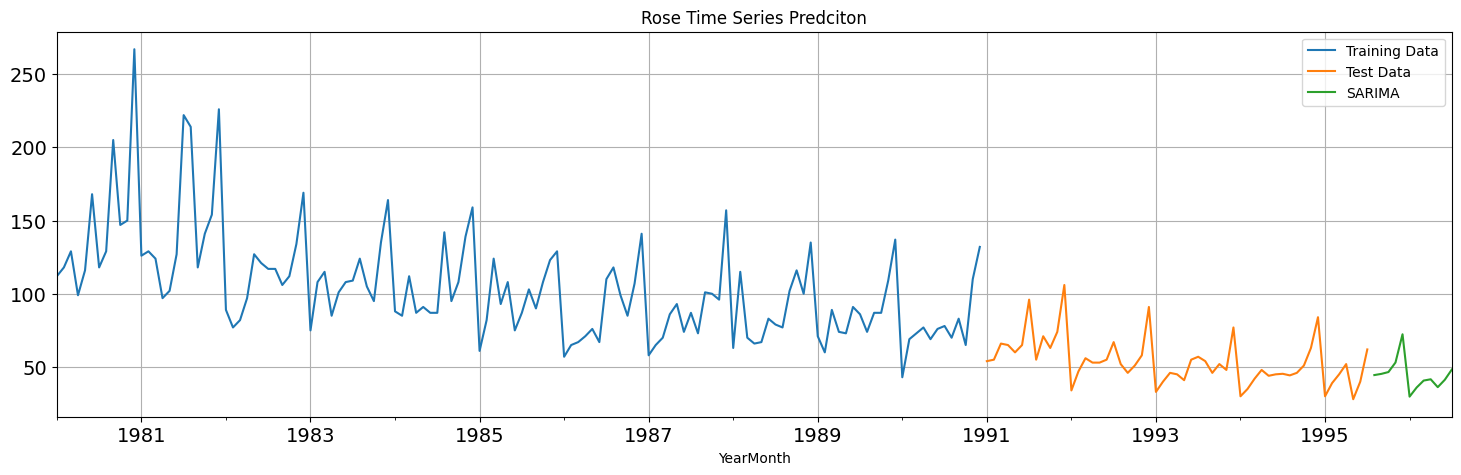

In [79]:
rose_train['Rose'].plot(figsize=(18,5), fontsize=14)
rose_test['Rose'].plot(figsize=(18,5), fontsize=14)
#prediction_tes_rose.plot(figsize=(13,5), fontsize=14)
best_sarima_rose_results.plot(figsize=(18,5),fontsize=14)
plt.grid()
plt.title("Rose Time Series Predciton")
plt.legend(['Training Data','Test Data','SARIMA'])
plt.show()

Forecasted Time Series with confidence interval

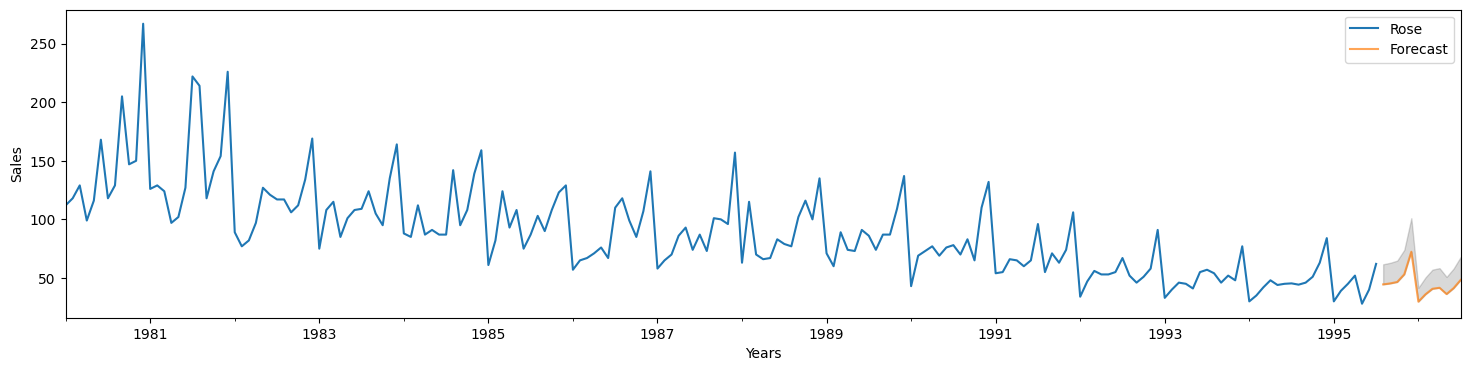

In [80]:
# plot the forecast along with the confidence band

axis = df_rose.plot(label='Observed', figsize=(18, 4))
best_sarima_rose_results.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(best_sarima_rose_results.index, np.power(10,best_sarima_rose_results_95.predicted_mean).values, np.power(10,rose_ci_95)['upper Rose'].values ,color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()

##Sparkling

In [89]:
model_tes_sparkling = ExponentialSmoothing(df_sparkling,trend='additive',seasonal='additive',initialization_method='estimated').fit()
alpha = model_tes_sparkling.params['smoothing_level'].round(3)
beta = model_tes_sparkling.params['smoothing_trend'].round(3)
gamma = model_tes_sparkling.params['smoothing_seasonal'].round(3)
prediction_tes_sparkling = model_tes_sparkling.forecast(steps = 12)

#best_tes_sparkling_results_99 = model_tes_sparkling.get_forecast(steps=12,alpha =0.01)
#best_tes_sparkling_results_95 = model_tes_sparkling.get_forecast(steps=12,alpha =0.05)
#sparkling_ci_99 = best_tes_sparkling_results_99.conf_int()
#sparkling_ci_95 = best_tes_sparkling_results_95.conf_int()

In [ ]:
sparkling_train['Sparkling'].plot(figsize=(18,5), fontsize=14)
sparkling_test['Sparkling'].plot(figsize=(18,5), fontsize=14)
#prediction_tes_sparkling.plot(figsize=(13,5), fontsize=14)
prediction_tes_sparkling.plot(figsize=(13,5),fontsize=14)
plt.grid()
plt.title("Sparkling Time Series Predciton")
plt.legend(['Training Data','Test Data','TES'])
plt.show()

Forecasted Time Series with confidence interval(using sarima model here to show confidence interval, as TES doesnt support Confidence intervals)

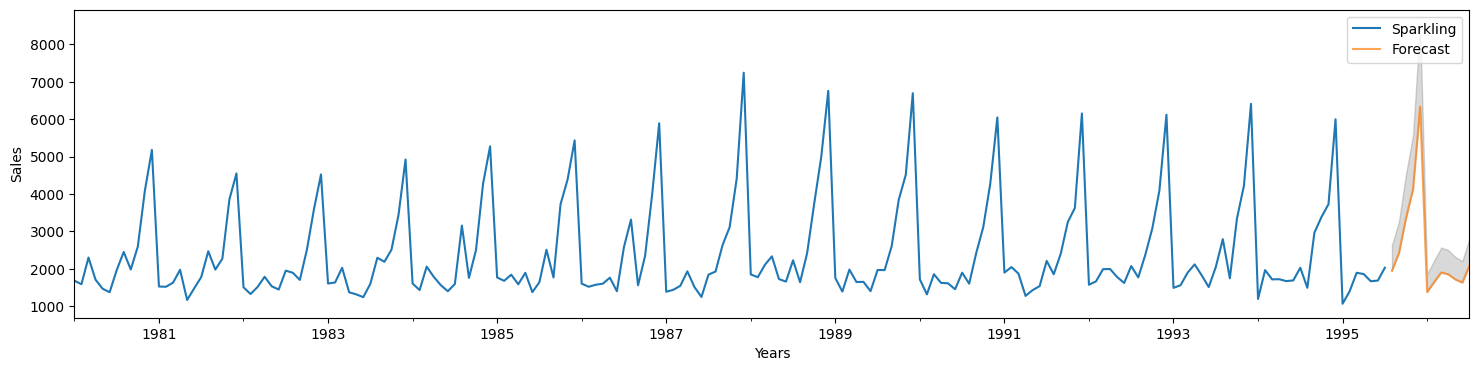

In [169]:
full_sparkling_data = np.log10(df_sparkling)
SARIMA_model_sparkling = sm.tsa.statespace.SARIMAX(full_sparkling_data,
                                            order=(1, 0, 1),
                                            seasonal_order=(1, 0, 1, 12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

results_SARIMA_sparkling = SARIMA_model_sparkling.fit(maxiter=1000)
best_sarima_sparkling_results = results_SARIMA_sparkling.get_forecast(steps=12)

best_sarima_sparkling_results_99 = results_SARIMA_sparkling.get_forecast(steps=12,alpha =0.01)
best_sarima_sparkling_results_95 = results_SARIMA_sparkling.get_forecast(steps=12,alpha =0.05)
sparkling_ci_99 = best_sarima_sparkling_results_99.conf_int()
sparkling_ci_95 = best_sarima_sparkling_results_95.conf_int()

axis = df_sparkling.plot(label='Observed', figsize=(18, 4))
best_sarima_sparkling_results = np.power(10,best_sarima_sparkling_results.predicted_mean)
best_sarima_sparkling_results.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(best_sarima_sparkling_results.index, np.power(10,best_sarima_sparkling_results_95.predicted_mean).values, np.power(10,sparkling_ci_95)['upper Sparkling'].values ,color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()


In [170]:
best_sarima_sparkling_results.index

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')